In [1]:
# Import local classes
import sys
sys.path.append(r'../../src/')
import bivariate.class_copula

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyvinecopulib as cop
import scipy.stats as st



## Using Copula class for a Bivariate Distribution

In [2]:
# Create distributions for 2 random variables, X1 and X2
X1 = st.norm(0,1)           # Normal distribution with mean 0 and standard deviation 1
X2 = st.gumbel_r(0,1)       # Gumbel distribution with location 0 and scale 1

# Create a copula object
Copula_12 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.7])


In [3]:
# Define a bivariate copula object
bivariate_copula_object = bivariate.class_copula.Bivariate([X1,X2], Copula_12)

In [4]:
# Generate random samples from the bivariate copula object
gen_random_samples = bivariate_copula_object.random_samples(1000)

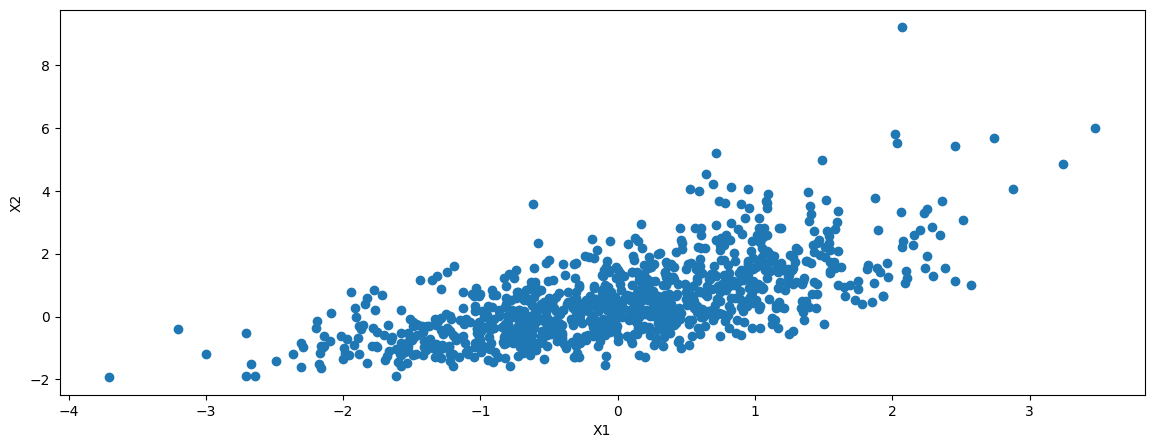

In [5]:
# Plot the random samples
bivariate_copula_object.plot_random_samples();

In [6]:
# Define a 2D region of interest object and insert the random samples
region = bivariate.class_copula.Region_of_interest(random_samples=gen_random_samples)

# Define a rectangular region of interest
region.define_rectangle(x_left_lower=0.5, y_left_lower=0.5, x_right_upper=1, y_right_upper=1)

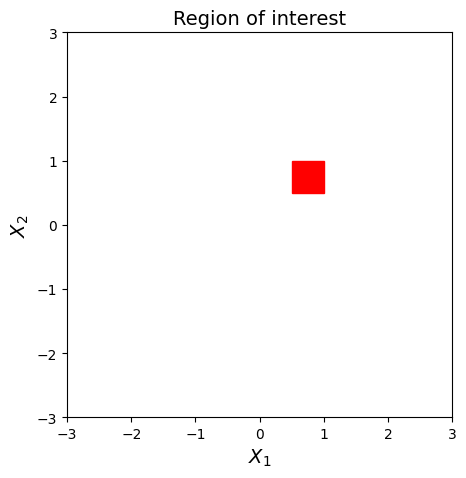

In [7]:
# Plot the rectangular region of interest
region.plot_rectangle(xy_lim = [-3, 3, -3, 3]);

In [8]:
region.inside_rectangle()
# region.plot_inside_rectangle();

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

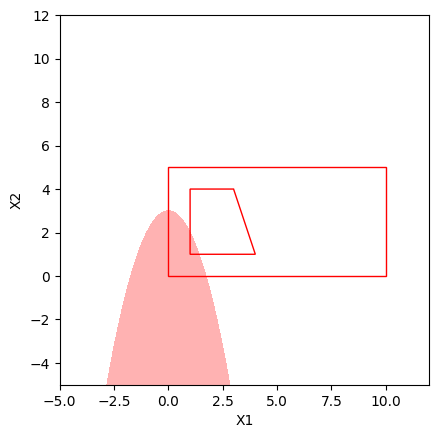

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as pltPolygon

class RegionOfInterest:
    def __init__(self, region_type, **kwargs):
        self.region_type = region_type
        self.kwargs = kwargs
        self.plot_data = None

    def is_inside(self, point):
        if self.region_type == "rectangle":
            return self._is_inside_rectangle(point)
        elif self.region_type == "polygon":
            return self._is_inside_polygon(point)
        elif self.region_type == "function":
            return self._is_inside_function(point)
        else:
            raise ValueError("Invalid region type")

    def _is_inside_rectangle(self, point):
        x1, x2 = point
        return self.kwargs["x1_min"] <= x1 <= self.kwargs["x1_max"] and \
               self.kwargs["x2_min"] <= x2 <= self.kwargs["x2_max"]

    def _is_inside_polygon(self, point):
        x, y = point
        n = len(self.kwargs["points"])
        inside = False
        p1x, p1y = self.kwargs["points"][0]
        for i in range(n + 1):
            p2x, p2y = self.kwargs["points"][i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
            p1x, p1y = p2x, p2y
        return inside

    def _is_inside_function(self, point):
        x1, x2 = point
        return self.kwargs["func"](x1, x2) >= 0

    def plot(self):
        if self.region_type == "rectangle":
            self._plot_rectangle()
        elif self.region_type == "polygon":
            self._plot_polygon()
        elif self.region_type == "function":
            self._plot_function()
        else:
            raise ValueError("Invalid region type")

    def _plot_rectangle(self):
        rect = plt.Rectangle((self.kwargs["x1_min"], self.kwargs["x2_min"]),
                             self.kwargs["x1_max"] - self.kwargs["x1_min"],
                             self.kwargs["x2_max"] - self.kwargs["x2_min"],
                             linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

    def _plot_polygon(self):
        polygon = pltPolygon(self.kwargs["points"], closed=True, edgecolor='r', facecolor='none')
        plt.gca().add_patch(polygon)

    def _plot_function(self):
        x1_values = np.linspace(self.kwargs["x_range"][0], self.kwargs["x_range"][1], 100)
        x2_values = np.linspace(self.kwargs["y_range"][0], self.kwargs["y_range"][1], 100)
        X1, X2 = np.meshgrid(x1_values, x2_values)
        Z = self.kwargs["func"](X1, X2)
        plt.contourf(X1, X2, Z, levels=[-np.inf, 0], colors='r', alpha=0.3)


# Example usage
fig, ax = plt.subplots()

# Create regions
rect_roi = RegionOfInterest(region_type="rectangle", x1_min=0, x1_max=10, x2_min=0, x2_max=5)
polygon_roi = RegionOfInterest(region_type="polygon", points=[(1, 1), (4, 1), (3, 4), (1, 4)])
arbitrary_func_roi = RegionOfInterest(region_type="function", func=lambda x1, x2: x1**2 + x2 - 3,
                                       x_range=(-5, 5), y_range=(-5, 5))

# Plot regions
rect_roi.plot()
polygon_roi.plot()
arbitrary_func_roi.plot()

# Set plot limits and labels
plt.xlim([-5, 12])
plt.ylim([-5, 12])
plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal', 'box')

plt.show()
